# Exercise 1

We first load a dataset and examine its dimensions.

In [1]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
import math
import numpy as np

xy_data = np.load('Ex1_polyreg_data.npy')
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/Ex1_polyreg_data.npy'

np.shape(xy_data)

(70, 2)

The matrix `xy_data` contains $70$ rows, each a data point of the form $(x_i,y_i)$ for $i=1, \ldots, 70$.

### 1a) Plot the data in a scatterplot.

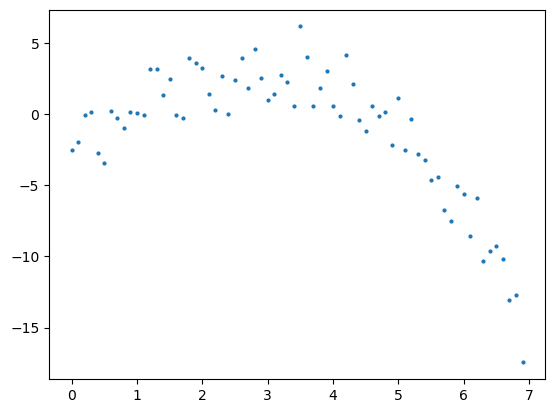

In [8]:
import matplotlib.pyplot as plt
# Your code for scatterplot here
x_data, y_data = np.swapaxes(xy_data, 0, 1)

plt.scatter(x_data, y_data, s=4)


### 1b) Write a function `polyreg` to fit a polynomial of a given order to a dataset. 
The inputs to the function are a data matrix of dimension $N \times 2$,  and $k \geq 0$, the order of the polynomial.   The function should compute the coefficients of the polynomial $\beta_0 + \beta_1 x +  \ldots  +\beta_k x^{k}$ via least squares regression, and should return the coefficient vector, the fit, and the vector of residuals. 

If specified the degree $k$ is greater than or equal to $N$, then the function must fit an order $(N-1)$ polynomial and set the remaining coefficients to zero.

**NOTE**: You are *not* allowed to use the built-in function `np.polyfit`.

In [40]:
def lin_reg(data_matrix, funcs, k):
    def least_squares(X, y):
        """Returns least squares solution to X @ beta = y"""
        # Find the transpose of X
        XT = X.T
        # Find the inverse of (XT @ X)
        inv_XT_X = np.linalg.inv(XT @ X)

        return inv_XT_X @ (XT @ y)
    
    def y_col(X, beta):
        """Returns component of y in column space of X"""
        return X @ beta
    
    def residual(X, y, beta):
        """Returns a vector of the residuals from the least squares solution"""
        return y - y_col(X, beta)
    
    def sse(X, y, beta):
        """Returns sum of squared errors"""
        res = residual(X, y, beta)
        return res.T @ res
    
    def fit(X, y, beta):
        """Returns R^2, the coefficient of determination, a measure of goodness of fit"""
         # Get SSE_0
        res_0 = y - np.mean(y)*np.ones(x.shape[0])
        sse_0 = res_0.T @ res_0
        return 1-sse(X, y, beta)/sse_0
    
    k = len(data_matrix)-1 if k >= len(data_matrix) else k
    x, y = np.swapaxes(data_matrix, 0, 1)

    # Find matrix X
    X = np.array(list(map(lambda xpt: [g(xpt) for g in funcs[:k+1]], x)))

    beta =  least_squares(X, y)

    return beta, fit(X, y, beta), residual(X, y, beta), y_col(X, beta)

def power(n):
        def pw(x):
            return x**n
        return pw

def polyreg(data_matrix, k):
    funcs = [power(n) for n in range(k+1)]
    return lin_reg(data_matrix, funcs, k)

def lin_sin_fit(data_matrix):
    funcs = [power(0), power(1), np.sin, np.cos]
    return lin_reg(data_matrix, funcs, 3)

Use the tests below to check the outputs of the function you have written:

In [37]:
# Some tests to make sure your function is working correctly

xcol = np.arange(-1, 1.05, 0.1)
ycol = 2 - 7*xcol + 3*(xcol**2)  # We are generating data accoridng to y = 2 - 7x + 3x^2
test_matrix = np.transpose(np.vstack((xcol,ycol)))
test_matrix.shape

beta_test = polyreg(test_matrix, k=2)[0] 
assert((np.round(beta_test[0], 3) == 2) and (np.round(beta_test[1], 3) == -7) and (np.round(beta_test[2], 3) == 3))  
# We want to check that using the function with k=2 recovers the coefficients exactly

# Now check the zeroth order fit, i.e., the function gives the correct output with k=0
beta_test = polyreg(test_matrix, k=0)[0]
res_test = polyreg(test_matrix, k=0)[2] #the last output of the function gives the vector of residuals

assert(np.round(beta_test, 3) == 3.1)
assert(np.round(np.linalg.norm(res_test), 3) == 19.937)

### 1c) Use `polyreg` to fit polynomial models for the data in `xy_data` for $k=2,3,4$:

- Plot the fits for the three cases on the same plot together with the scatterplot of the data. The plots should be labelled and a legend included. 
- Compute and print the SSE and $R^2$ coefficient for each of the three cases.
- Which of the three models you would choose? Briefly justify your choice.

k: 2 - SSE: 172.18, R^2: 0.88763
k: 3 - SSE: 152.41, R^2: 0.90054
k: 4 - SSE: 151.23, R^2: 0.90130


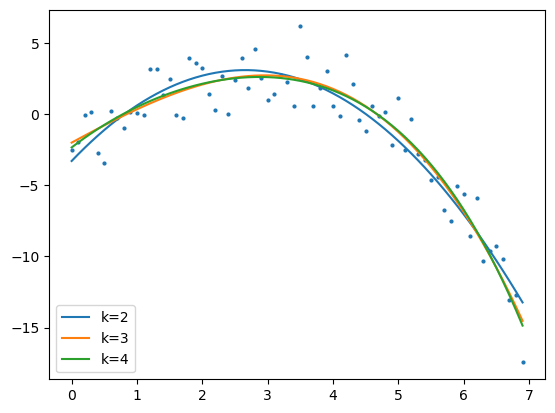

In [41]:
k_list = [2, 3, 4]

plt.scatter(x_data, y_data, s=4)

for k in k_list:
    beta, fit, res, y_col = polyreg(xy_data, k)
    print(f'k: {k} - SSE: {float(res.T @ res):.2f}, R^2: {float(fit):.5f}')
    plt.plot(x_data, y_col, label=f'k={k}')

plt.legend(loc='lower left')
plt.show()

 #### State which model you choose and briefly justify your choice.
 
 
 < fill in your answer in this cell.>
 
 *k = 4 has the lowest SSE and highest R^2, indicating it is the best fit for the data available.*

### 1d)  For the model you have chosen in the previous part (either $k=2/3/4)$:

- Plot the residuals in a scatter plot. 
- Plot a histogram of the residuals along with a Gaussian pdf with zero mean and the same standard deviation as the residuals.

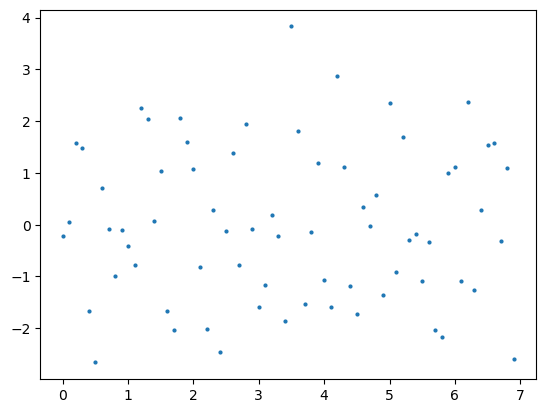

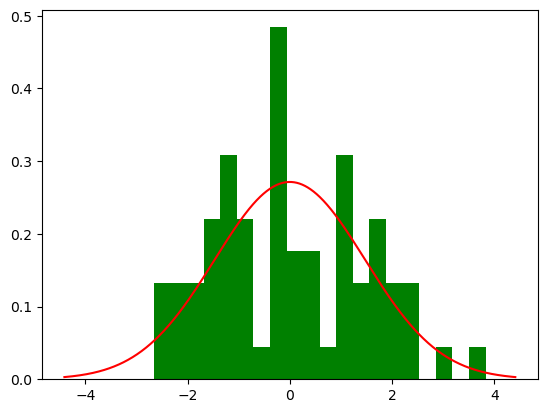

In [47]:
#Your code here
from scipy.stats import norm

k = 4
beta, fit, res, y_col = polyreg(xy_data, k)

# Scatter plot of residuals
plt.scatter(x_data, res, s=4)
plt.show()

# Histogram of residuals
n, bins, patches = plt.hist(res, bins=20, density=True, facecolor='green')

# Plot Gaussian pdf with same mean and variance as the residuals
res_stdev = np.std(res)  #standard deviation of residuals
xvals = np.linspace(-3*res_stdev,3*res_stdev,1000)
plt.plot(xvals, norm.pdf(xvals, loc=0, scale=res_stdev), 'r')
plt.show()

